## Handwritten Digit Recognition Using Neural Networks and SVM

## Neural Netwroks

tensorflow and Keras

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# normalizing data

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [7]:
model = tf.keras.models.Sequential()

In [11]:
# flatten the layer (28x28)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2051 - accuracy: 0.9423
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1148 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9756


In [16]:
model.save('handwritten.model')

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9719


In [18]:
print(loss)
print(accuracy)

0.09351717680692673
0.9718999862670898


Uploading the test images with different digit to test the accuracy prediction of the model.

Saving 1.png to 1.png


Saving 2.png to 2.png


Saving 3.png to 3.png
1.png not found among uploaded files.
2.png not found among uploaded files.
1/1 [==============================] - 0s 18ms/step
This digit is probably 6


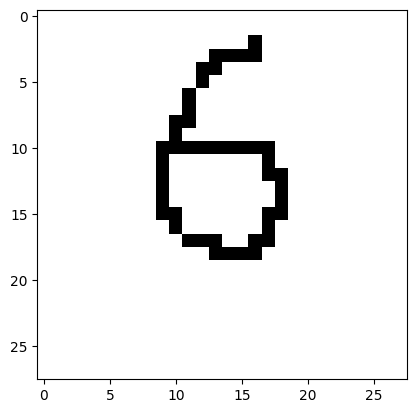

In [26]:
from google.colab import files
import time

# Upload images
uploaded_files = files.upload()
time.sleep(3)
uploaded_files = files.upload()
time.sleep(3)
uploaded_files = files.upload()
time.sleep(5)
# Process uploaded images
for image_number in range(1, 4):  # Assuming you have uploaded files named 1.png, 2.png, and 3.png
    filename = f"{image_number}.png"

    # Check if the uploaded file exists
    if filename in uploaded_files:
        try:
            img = cv2.imread(filename)[:, :, 0]
            img = np.invert(np.array([img]))
            prediction = model.predict(img)
            print(f"This digit is probably {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    else:
        print(f"{filename} not found among uploaded files.")


Neural Network accurately predict the digit.

## Using SVM

openml

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


In [3]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist.data.astype("float32")
y = mnist.target.astype("int")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a Support Vector Machine (SVM) classifier
clf = svm.SVC(gamma=0.001)

In [6]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [7]:

# Predict the labels for the test set
y_pred = clf.predict(X_test)


In [8]:
# Calculate and print the classification report
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.11      1.00      0.21      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.11     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.11      0.02     14000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The warning messages at the end of the report indicate that precision and F1-score are ill-defined for some classes because there are no predicted samples for those classes. This suggests that model might not be well-trained or that there's an issue with the class distribution in dataset.

To improve the performance of model, may need to:

  1. Investigate the class distribution in dataset. If some classes have very few samples, it can be challenging for the model to learn them effectively.
  2. Experiment with different machine learning algorithms or model hyperparameters. SVM with default hyperparameters may not be the best choice for this problem.
  3. Consider preprocessing steps such as data normalization, feature scaling, or dimensionality reduction techniques to improve model performance.

    

    